In [38]:
echo = True
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, geom_boxplot, theme, theme_bw, annotate, scale_x_continuous, scale_y_continuous, scale_fill_manual, scale_size

In [39]:
q1 = pd.read_csv("q1data.csv")
q2 = pd.read_csv("q2data.csv")
q3 = pd.read_csv('q3data.csv')

TASK 1

In [40]:
q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


1. The aesthetic is Income on the x-axis, life expectancy on the y-axis, the fill is world region, and the size is the population of the country.

C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


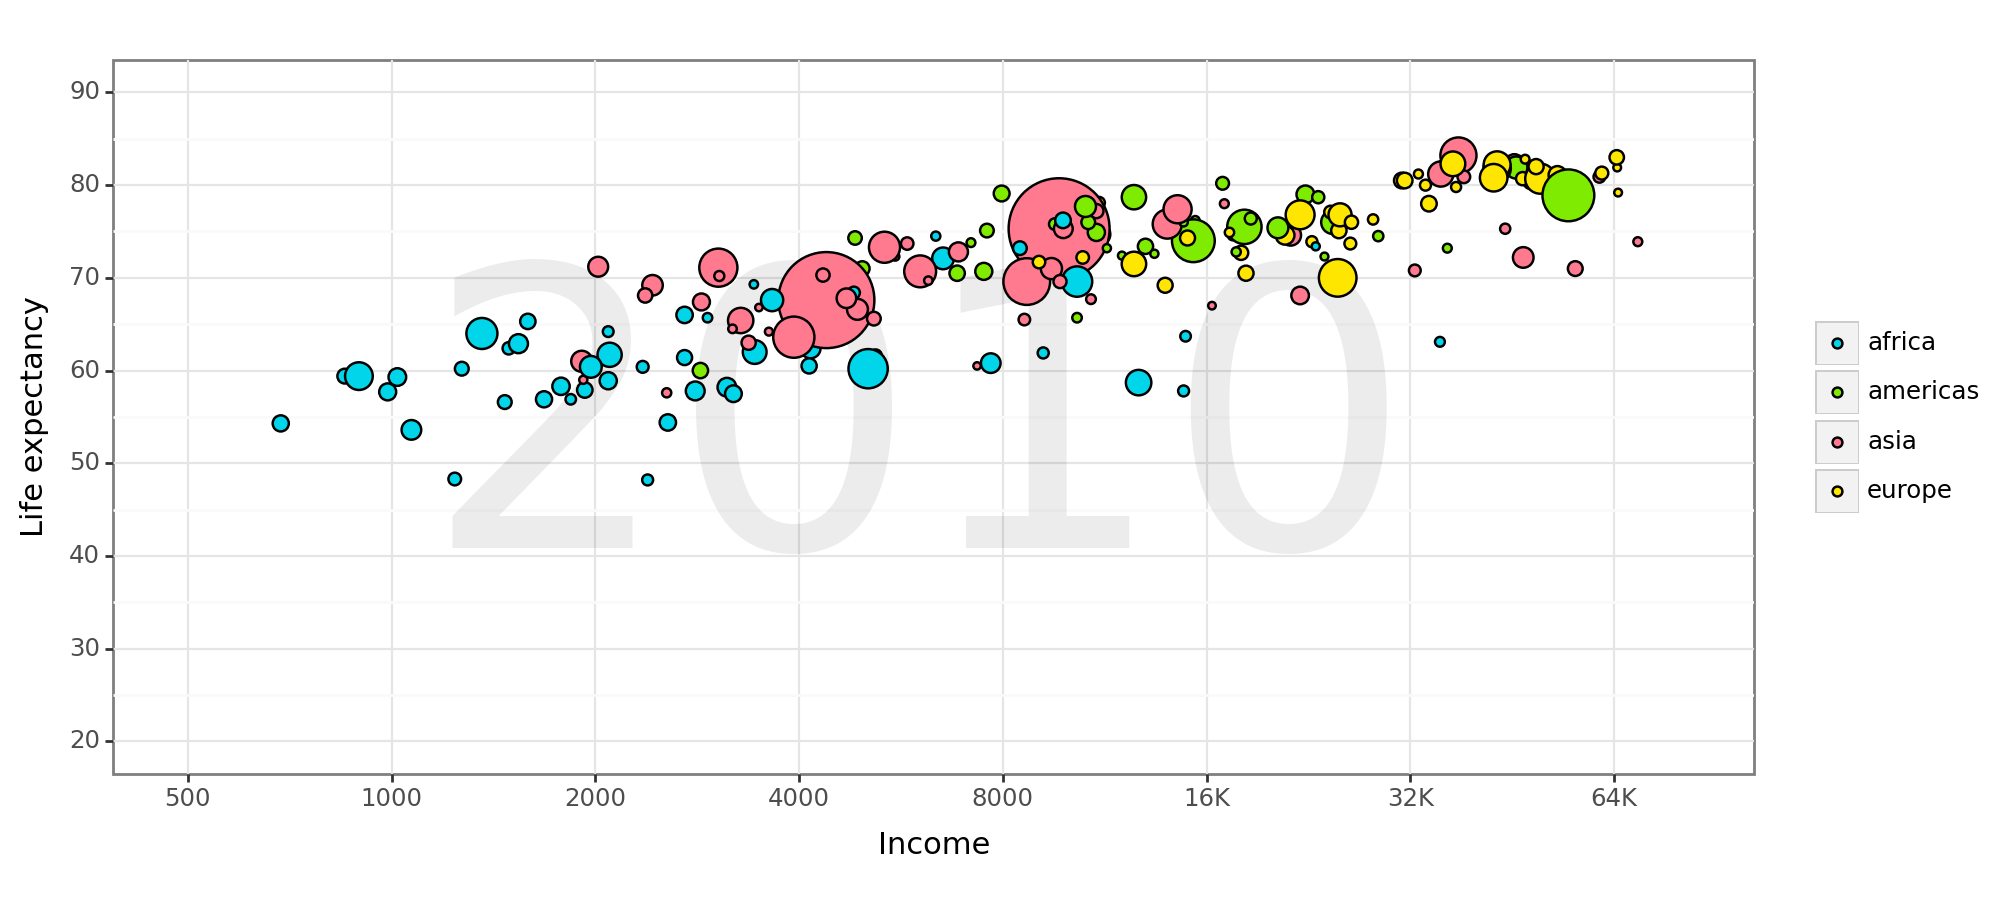

<Figure Size: (1000 x 450)>

In [41]:
q1 = q1.dropna(subset=['four_regions'])
from plotnine import *
from plotnine.scales import scale_x_log10
from plotnine.scales import scale_y_log10
(ggplot(q1,
aes(
  x = "income",
  y = "life_exp",
  fill = "four_regions",
    size = "population"
))
 +annotate("text", x=6000, y=52.5, label= "2010", size = 140, alpha = .075)
+ geom_point()
 + theme_bw()
 + scale_x_continuous(limits = (500, 80000), breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], trans = "log", labels = ["500", '1000', '2000', '4000', '8000', '16K', '32K', '64K'])
 + scale_y_continuous(limits = (20,90), breaks = [20,30, 40, 50, 60, 70, 80, 90])
  + theme(figure_size = (10, 4.5))
 + scale_size([1,20])
 + scale_fill_manual(values = {'africa':'#00d5e9', 'americas': '#7feb00', "asia": '#ff798f', 'europe': '#ffe600'} )
+ theme(legend_title = element_blank()) + guides(size=False)
 + labs(x = 'Income', y = 'Life expectancy')
)

4. Another gemoetry that could be used is two boxplots, each with Region on the x axis and one with income on the y, and one with life expectancy on the y. This is not as good for visualizing the data because it is harder to see how income and life expectancy relate to each other.

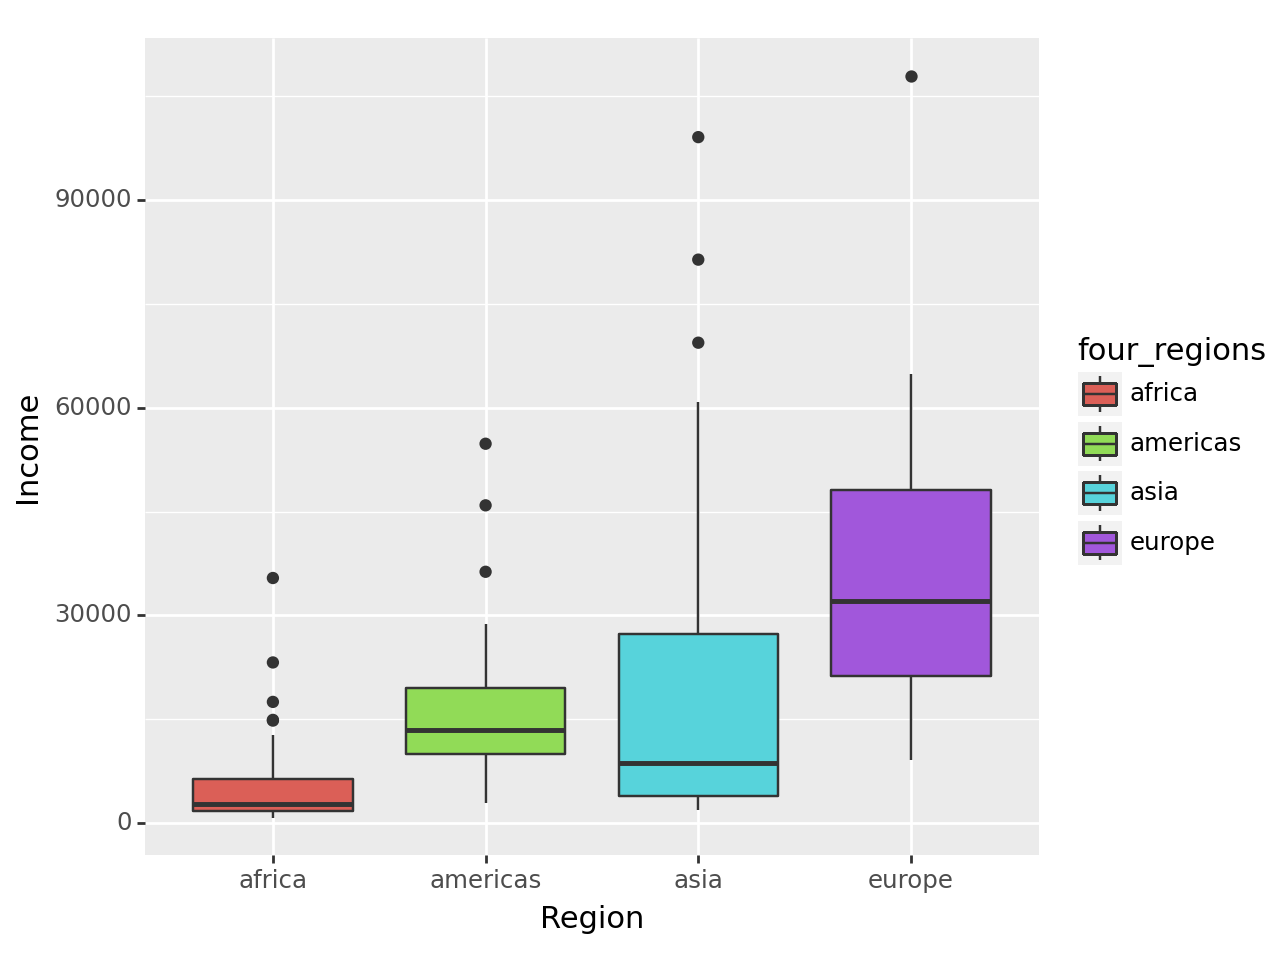

<Figure Size: (640 x 480)>

In [42]:
(ggplot(q1, aes(x = "four_regions", y = "income", fill = "four_regions", size = 'population'))
+ geom_boxplot()
+ labs(x = 'Region', y = 'Income'))

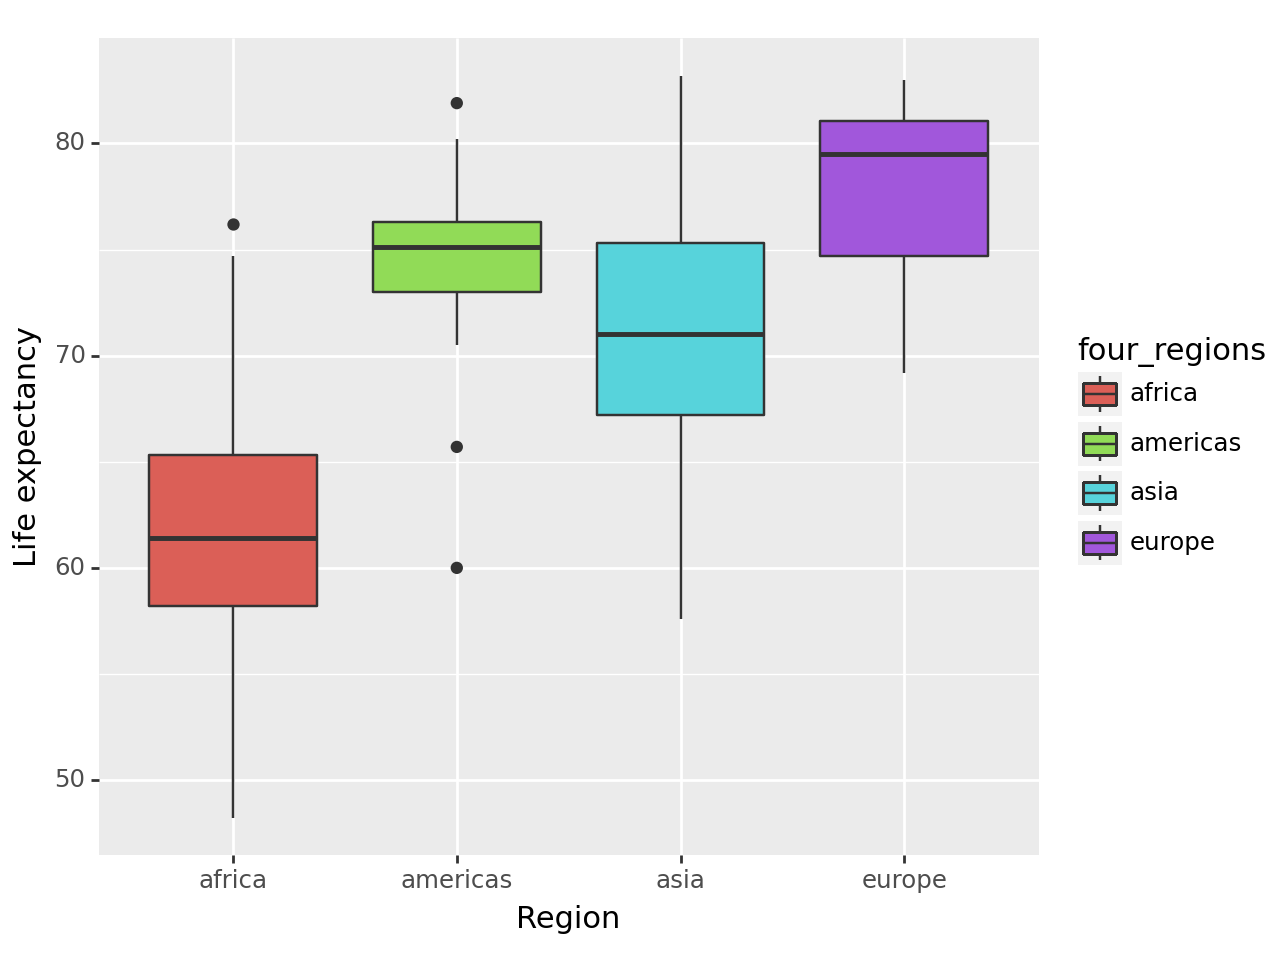

<Figure Size: (640 x 480)>

In [43]:
(ggplot(q1, aes(x = "four_regions", y = "life_exp", fill = "four_regions", size = 'population'))
+ geom_boxplot()
+ labs(x = 'Region', y = 'Life expectancy'))

TASK 2

In [44]:
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


1. The aesthetic is Exports on the x-axis, imports on the y-axis, the fill is world region, and the size is energy.

In [45]:
q2['energy'] = q2['energy'].astype(str)
i = 0
while i < len(q2['energy']):
    
    if 'k' in q2['energy'][i]:
        q2['energy'][i] = q2['energy'][i].replace('k', '')
        q2.loc[i, 'energy'] = float(q2.loc[i, 'energy'])
        q2['energy'][i] = q2['energy'][i]*1000
        i = i + 1
    else:
        q2.loc[i, 'energy'] = float(q2.loc[i, 'energy'])
        i = i + 1
      
        

C:\Users\jamla\AppData\Local\Temp\ipykernel_11720\2296454199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jamla\AppData\Local\Temp\ipykernel_11720\2296454199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 55 rows containing missing values.


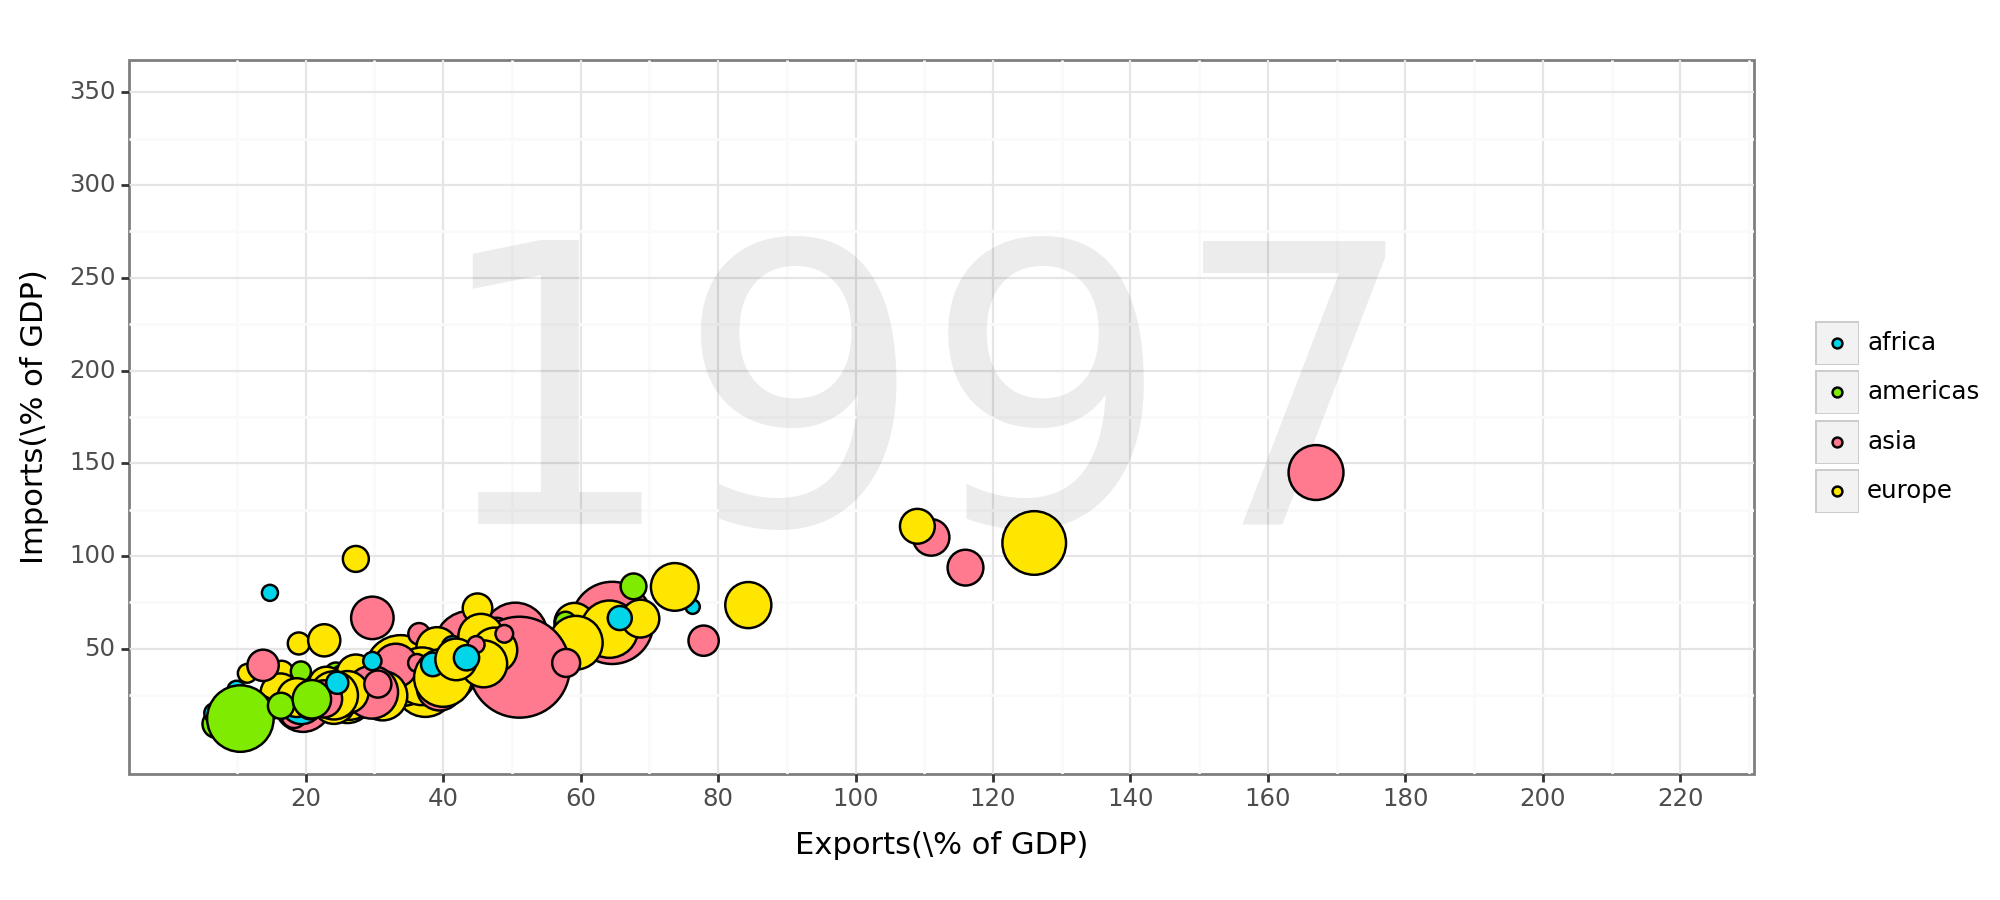

<Figure Size: (1000 x 450)>

In [46]:
q2['energy'] = q2['energy'].astype(float)
q2 = q2.dropna(subset=['four_regions'])
from plotnine.scales import scale_x_log10
from plotnine.scales import scale_y_log10
(ggplot(q2,
aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
    size = "energy"
))
 +annotate("text", x=110, y=175, label= "1997", size = 140, alpha = .075)
+ geom_point()
 + theme_bw()
 + scale_x_continuous(limits = (5, 220), breaks = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
 + scale_y_continuous(limits = (0,350), breaks = [50,100, 150, 200, 250, 300, 350])
  + theme(figure_size = (10, 4.5))
 + scale_size([1,20])
 + scale_fill_manual(values = {'africa':'#00d5e9', 'americas': '#7feb00', "asia": '#ff798f', 'europe': '#ffe600'} )
+ theme(legend_title = element_blank()) + guides(size=False)
 + labs(x = 'Exports(\% of GDP)', y = 'Imports(\% of GDP)')
)

4. Another geometry that can be used here is a violin plot. This geometry does not do quite as well of a job of showing our data as two graphs are needed and there is some overlap of the data.



C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_ydensity : Removed 19 rows containing non-finite values.
C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\positions\position.py:229: PlotnineWarning: position_dodge requires non-overlapping x intervals


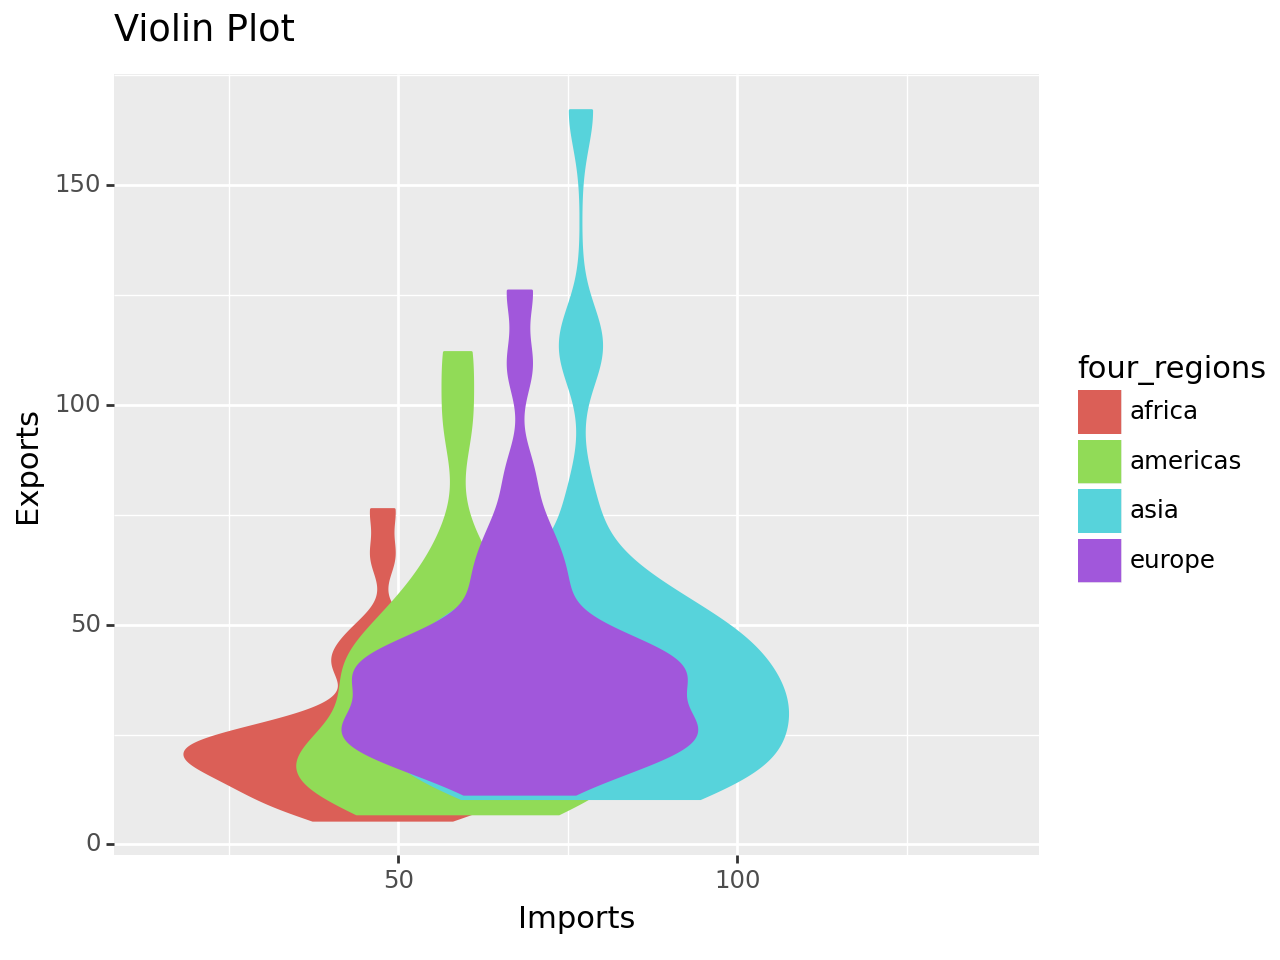

<Figure Size: (640 x 480)>

In [47]:
(ggplot(q2, aes(x='imports', y='exports', fill = 'four_regions', color = 'four_regions')) +
    geom_violin() +
    labs(title="Violin Plot", y="Exports", x="Imports")
)

C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_ydensity : Removed 55 rows containing non-finite values.
C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\positions\position.py:229: PlotnineWarning: position_dodge requires non-overlapping x intervals


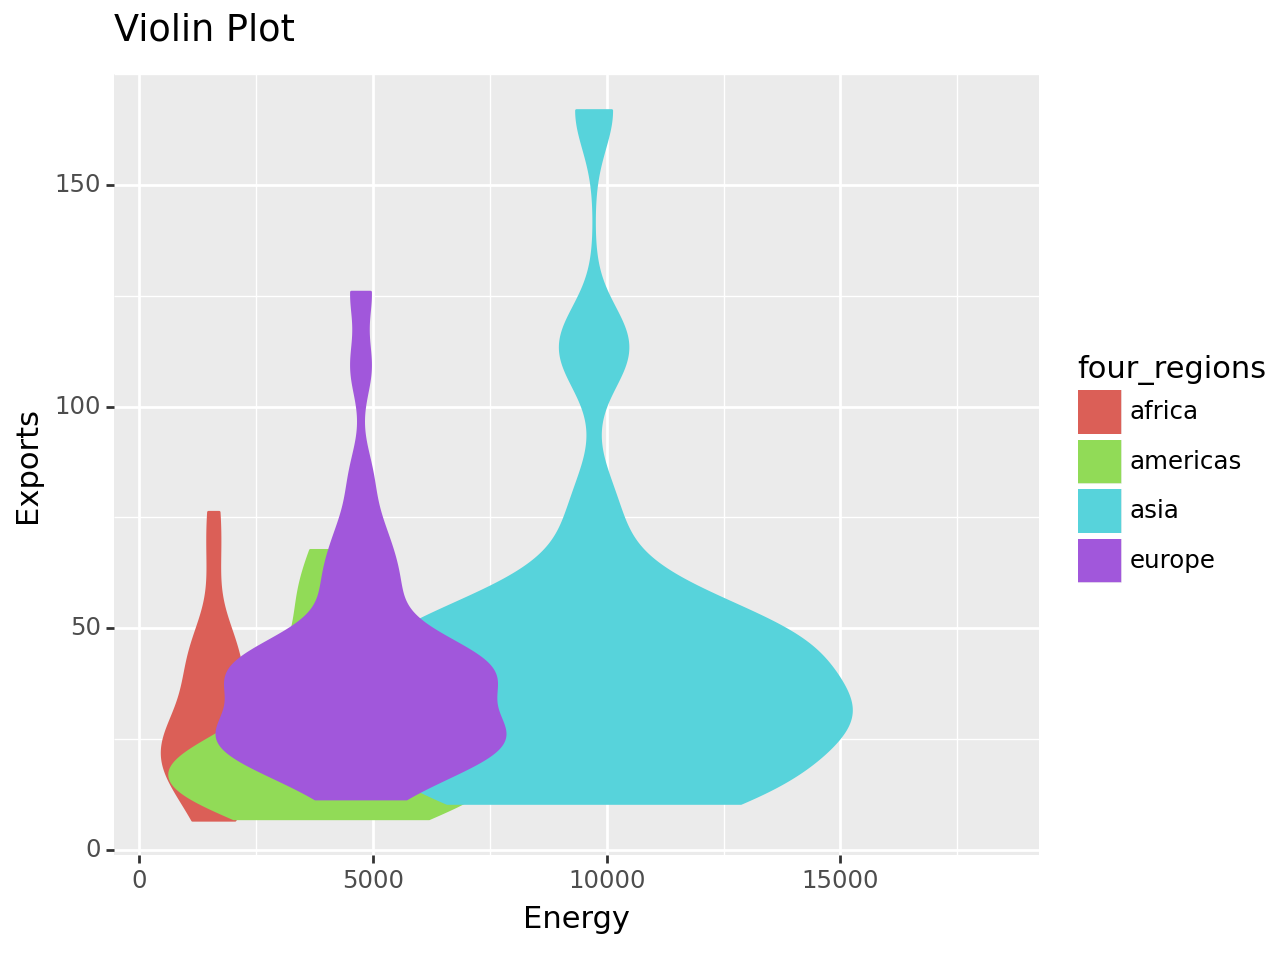

<Figure Size: (640 x 480)>

In [48]:
(ggplot(q2, aes(x='energy', y='exports', fill = 'four_regions', color = 'four_regions')) +
    geom_violin() +
    labs(title="Violin Plot", y="Exports", x="Energy")
)

TASK 3

In [49]:
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


1. The aesthetic is internet users on the x-axis, gdp on the y-axis, the fill is world region, and the size is the income of the country.

C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\scales\scale.py:783: RuntimeWarning: divide by zero encountered in log
C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


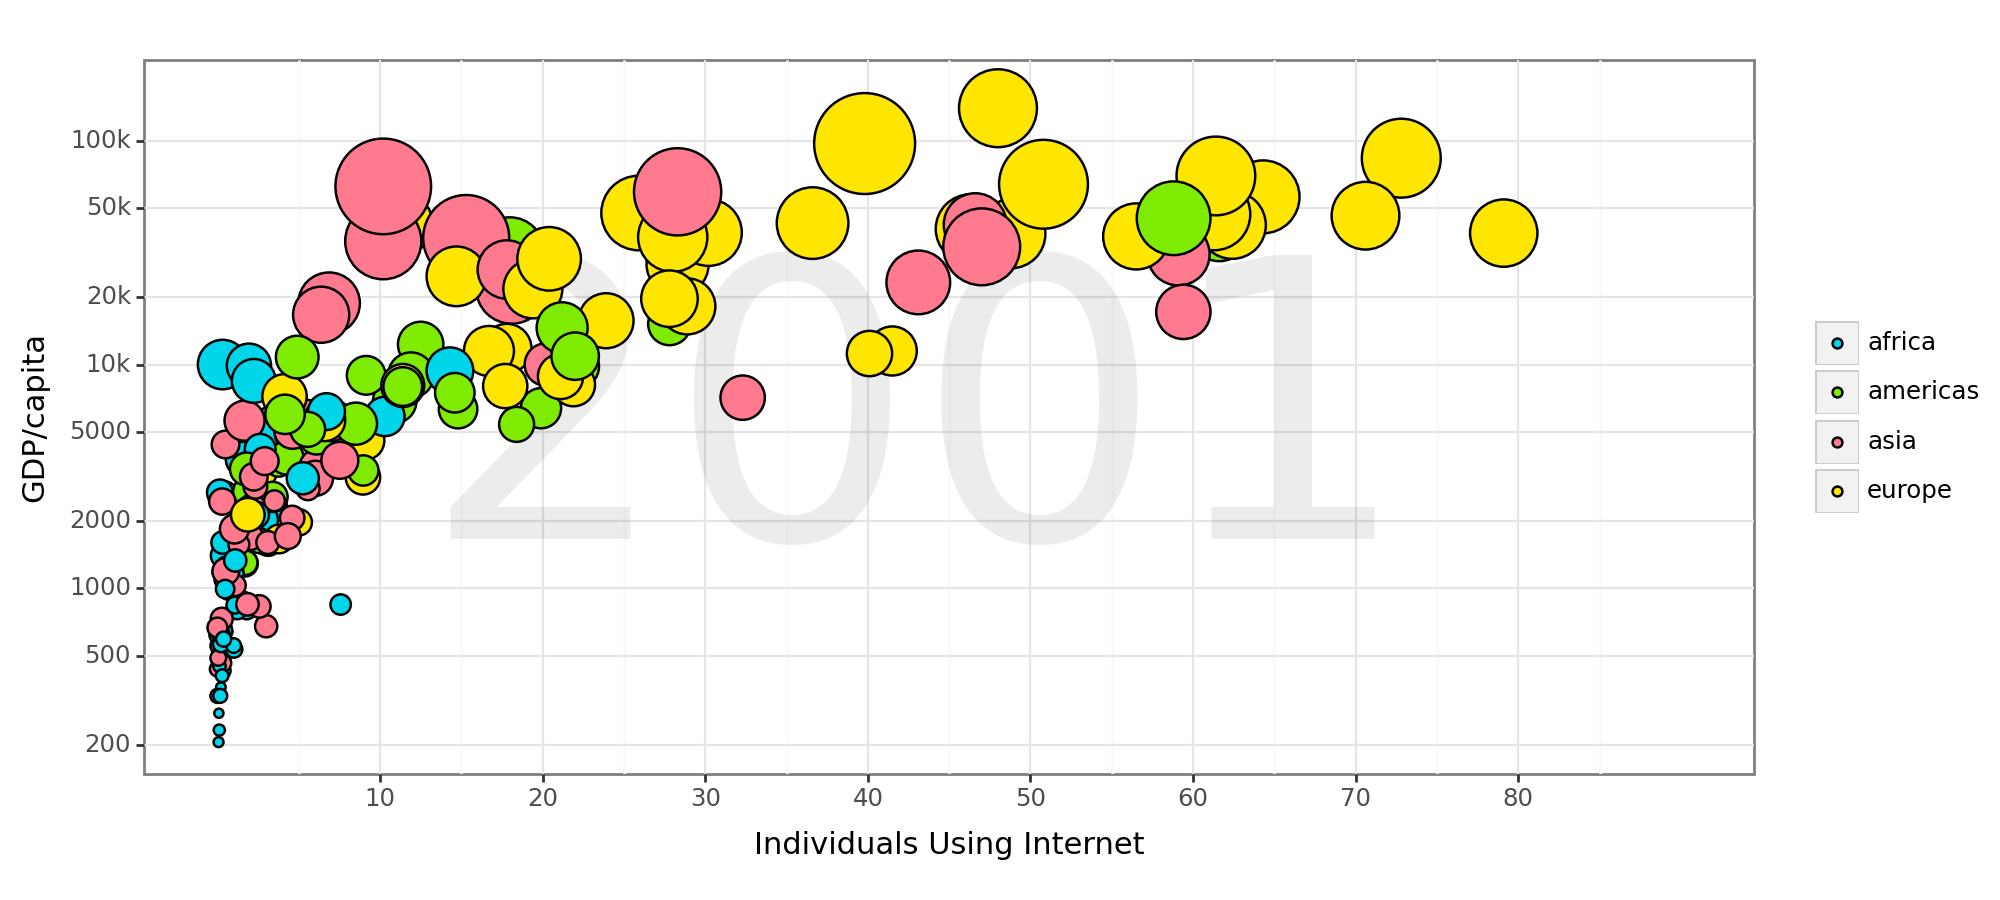

<Figure Size: (1000 x 450)>

In [50]:
from plotnine.scales import scale_x_log10
from plotnine.scales import scale_y_log10
q3 = q3.dropna(subset=['four_regions'])
(ggplot(q3,
aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
    size = "income"
))
 +annotate("text", x=43, y=5000, label= "2001", size = 140, alpha = .075)
+ geom_point()
 + theme_bw()
 + scale_x_continuous(limits = (0,90), breaks = [10,20,30,40,50,60,70,80], labels = [10,20,30,40,50,60,70,80])
 + scale_y_continuous(limits = (0,230000), trans = 'log', breaks = [200,500,1000,2000,5000,10000,20000,50000,100000], labels = [200, 500, 1000, 2000, 5000, '10k', '20k', '50k', '100k'])
  + theme(figure_size = (10, 4.5))
 + scale_size([1,20])
 + scale_fill_manual(values = {'africa':'#00d5e9', 'americas': '#7feb00', "asia": '#ff798f', 'europe': '#ffe600'} )
+ theme(legend_title = element_blank()) + guides(size=False)
 + labs(x = 'Individuals Using Internet', y = 'GDP/capita')
)

4. Another gemoetry that can be used instead of geom_point would be geom_line. This way of displaying the data does not look quite as clean as the scatterplot version and it is sometimes hard to tell what corresponds to what on the graph.

C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


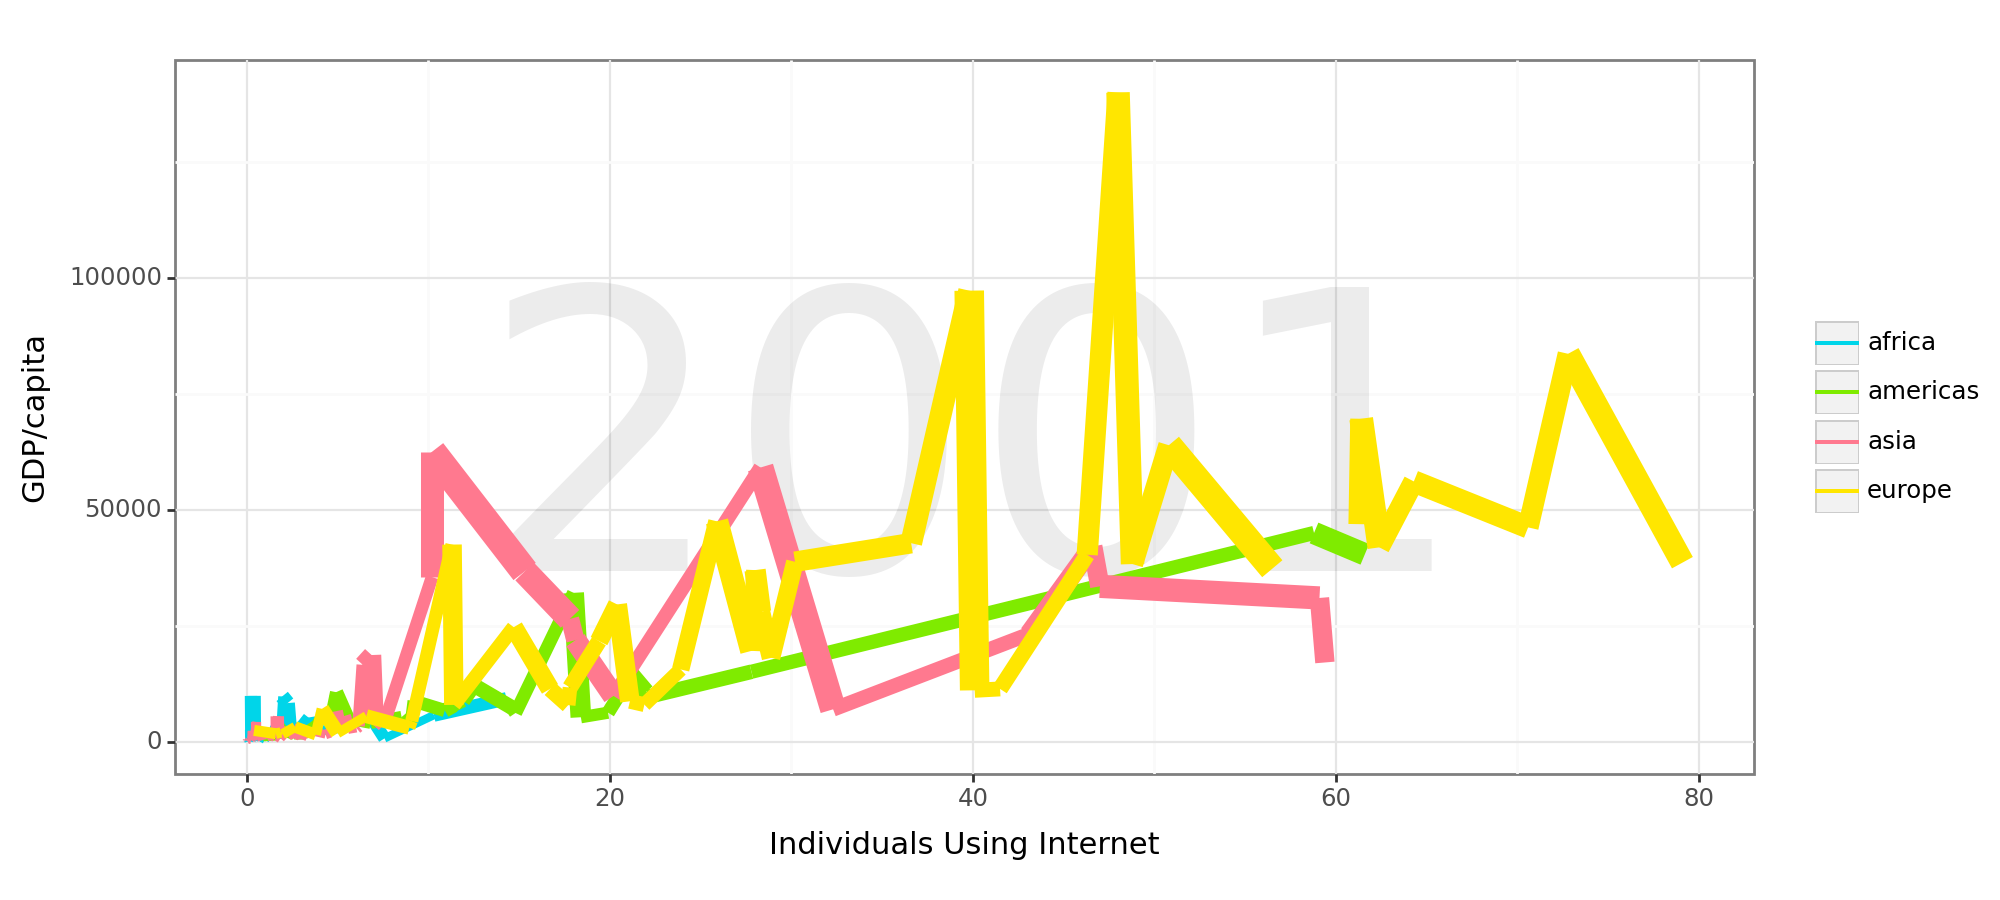

<Figure Size: (1000 x 450)>

In [51]:
(ggplot(q3,
aes(
  x = "internet_users",
  y = "gdp",
  color = "four_regions",
    size = "income"
))
 +annotate("text", x=40, y=60000, label= "2001", size = 140, alpha = .075)
+ geom_line()
 + theme_bw()
  + theme(figure_size = (10, 4.5))
 + scale_color_manual(values = {'africa':'#00d5e9', 'americas': '#7feb00', "asia": '#ff798f', 'europe': '#ffe600'} )
+ theme(legend_title = element_blank()) + guides(size=False)
 + labs(x = 'Individuals Using Internet', y = 'GDP/capita')
)